In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/drive/MyDrive/Datasets/depression_dataset.csv"
df = pd.read_csv(file_path)


In [ ]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2.0,Non-smoker,NaN,Unemployed,26265.67,Moderate,Moderate,Fair,NaN,No,Yes,Yes
1,Jacqueline Lewis,55,Married,NaN,1.0,Non-smoker,Sedentary,NaN,42710.36,High,NaN,Fair,Yes,NaN,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,NaN,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3.0,Non-smoker,Moderate,NaN,9992.78,NaN,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes


In [ ]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,349362.000000,413768.000000
mean,49.000713,1.298264,50661.707971
std,18.158759,1.236513,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [ ]:
print(df.columns)  # See all available column names


Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                369834 non-null  object 
 3   Education Level               369775 non-null  object 
 4   Number of Children            349362 non-null  float64
 5   Smoking Status                386889 non-null  object 
 6   Physical Activity Level       356501 non-null  object 
 7   Employment Status             344309 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           371932 non-null  object 
 10  Dietary Habits                349156 non-null  object 
 11  Sleep Patterns                378585 non-null  object 
 12  History of Mental Illness     353522 non-nul

In [ ]:
df.isnull().sum() # lists the null counts

Name                                0
Age                                 0
Marital Status                  43934
Education Level                 43993
Number of Children              64406
Smoking Status                  26879
Physical Activity Level         57267
Employment Status               69459
Income                              0
Alcohol Consumption             41836
Dietary Habits                  64612
Sleep Patterns                  35183
History of Mental Illness       60246
History of Substance Abuse      76270
Family History of Depression    26313
Chronic Medical Conditions      24192
dtype: int64

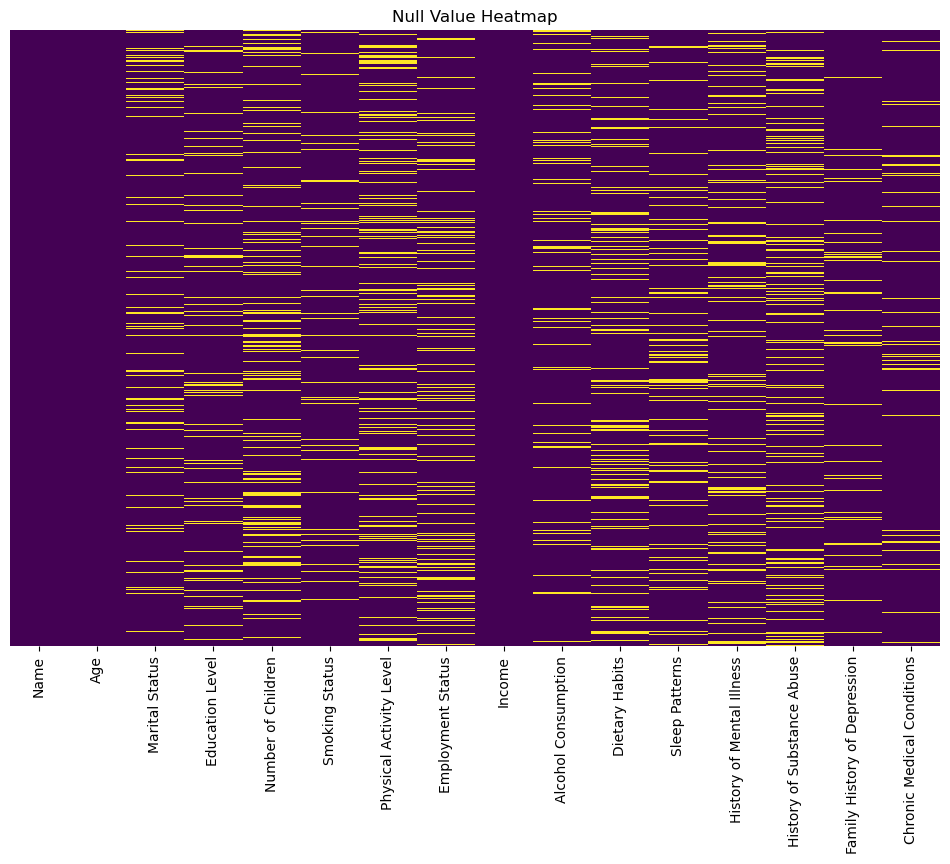

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 8))

# Visualize null values as a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)

plt.title('Null Value Heatmap')
plt.show()


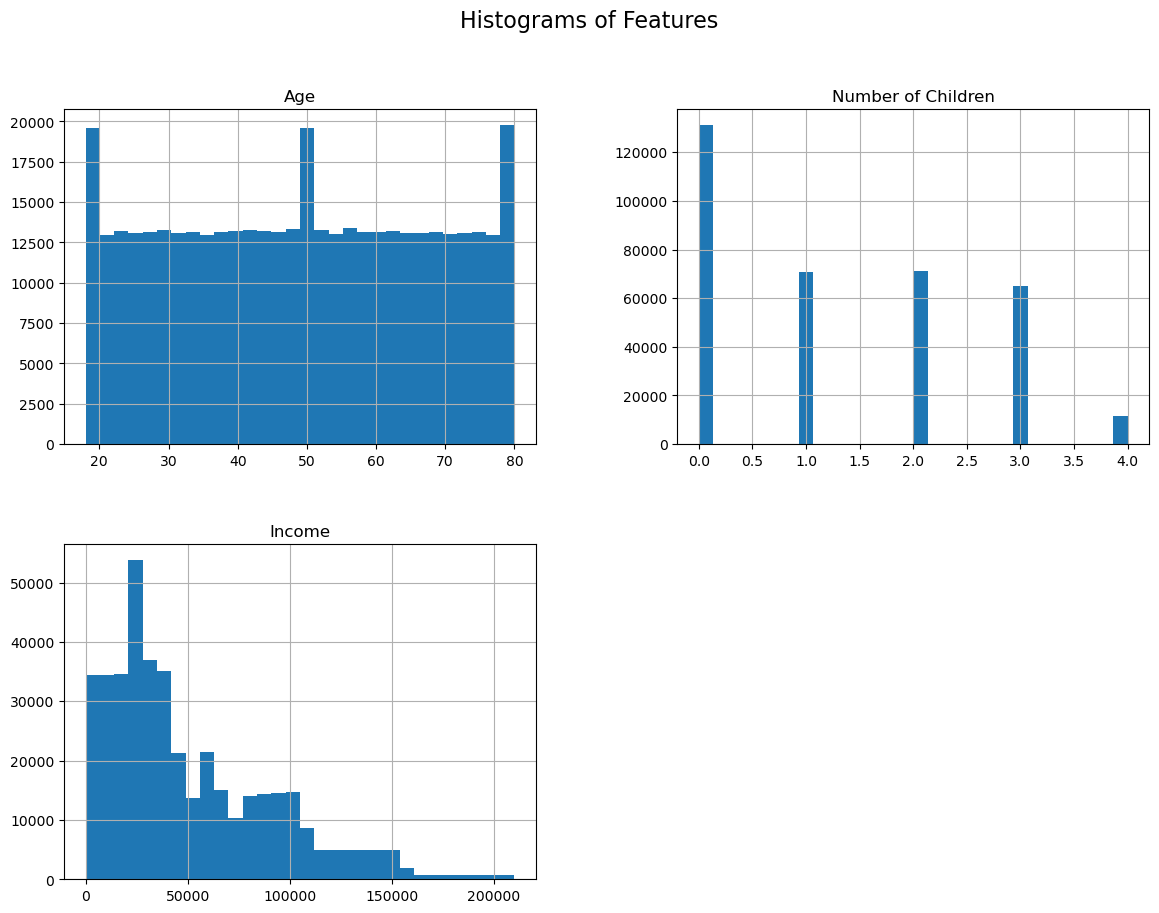

In [ ]:
# Plot histograms for all features
df.hist(figsize=(14, 10), bins=30)
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_15840\2715741918.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


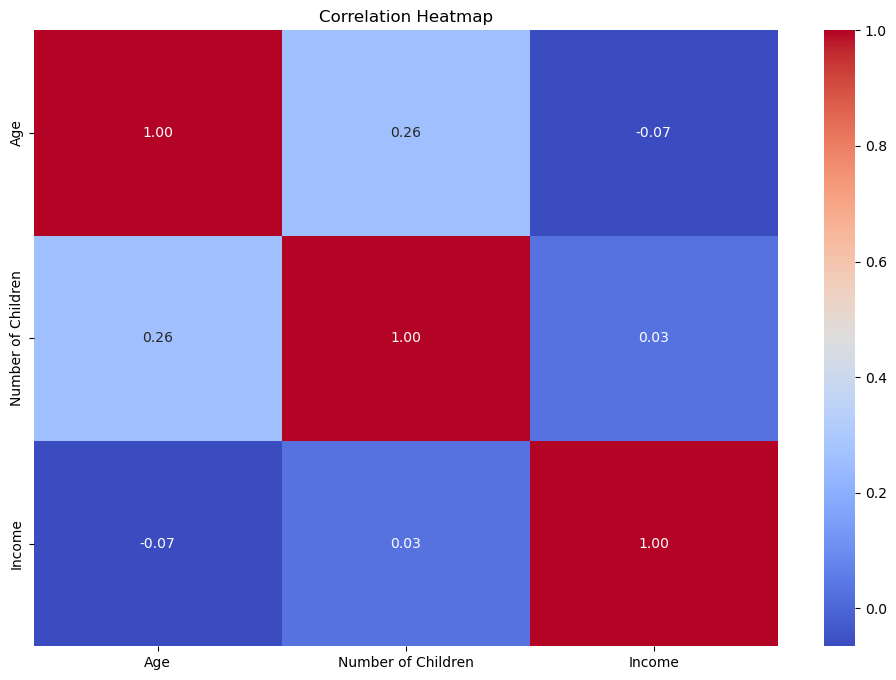

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


# Handling missing values

In [ ]:
# Handling missing numerical values (fill with median)
num_cols = ["Age", "Number of Children"]
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Handling missing categorical values (fill with mode)
cat_cols = ["Marital Status", "Education Level", "Smoking Status", "Physical Activity Level",
            "Employment Status", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns",
            "History of Mental Illness", "History of Substance Abuse",
            "Family History of Depression", "Chronic Medical Conditions"]

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

## Encoding the categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal categorical features
encoder = LabelEncoder()
df["Education Level"] = encoder.fit_transform(df["Education Level"])

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=["Marital Status", "Smoking Status", "Physical Activity Level",
                                  "Employment Status", "Alcohol Consumption", "Dietary Habits",
                                  "Sleep Patterns", "History of Mental Illness",
                                  "History of Substance Abuse", "Family History of Depression",
                                  "Chronic Medical Conditions"], drop_first=True)


### removing irrelavant features

In [ ]:
df.drop(columns=["Name"], inplace=True)


# Correlation analysis

In [ ]:
df.head()

,Age,Education Level,Number of Children,Income,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Smoking Status_Former,Smoking Status_Non-smoker,Physical Activity Level_Moderate,...,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Good,Sleep Patterns_Poor,History of Mental Illness_Yes,History of Substance Abuse_Yes,Family History of Depression_Yes,Chronic Medical Conditions_Yes
0,31,1,2.0,26265.67,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,1
1,55,1,1.0,42710.36,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,78,3,1.0,125332.79,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
3,58,3,3.0,9992.78,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
4,18,2,0.0,8595.08,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop(columns=["Income"])  # Features
y = df["Income"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model



In [ ]:
df.head()

,Age,Education Level,Number of Children,Income,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Smoking Status_Former,Smoking Status_Non-smoker,Physical Activity Level_Moderate,...,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Good,Sleep Patterns_Poor,History of Mental Illness_Yes,History of Substance Abuse_Yes,Family History of Depression_Yes,Chronic Medical Conditions_Yes
0,-0.991298,1,0.655513,26265.67,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,1
1,0.330380,1,-0.220650,42710.36,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,1.596988,3,-0.220650,125332.79,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
3,0.495590,3,1.531676,9992.78,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
4,-1.707206,2,-1.096813,8595.08,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,1


In [ ]:
# Add bias term
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        gradient = (1 / m) * np.dot(X.T, loss)
        W -= alpha * gradient
        cost = cost_function(X, Y, W)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return W, cost_history

def rmse(Y, Y_pred):
    return np.sqrt(mean_squared_error(Y, Y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def main():
    W = np.zeros(X_train_bias.shape[1])
    alpha = 0.1
    iterations = 5000
    W_optimal, cost_history = gradient_descent(X_train_bias, y_train.values, W, alpha, iterations)

    # Plot cost function over iterations
    plt.plot(range(iterations), cost_history, label='Cost Reduction Over Iterations', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.show()

    # Predictions
    Y_pred_train = np.dot(X_train_bias, W_optimal)
    Y_pred_test = np.dot(X_test_bias, W_optimal)

    # Training metrics
    train_mse = mean_squared_error(y_train, Y_pred_train)
    train_rmse = np.sqrt(train_mse)  # RMSE
    train_r2 = r2_score(y_train, Y_pred_train)

    # Test metrics
    test_mse = mean_squared_error(y_test, Y_pred_test)
    test_rmse = np.sqrt(test_mse)  # RMSE
    test_r2 = r2_score(y_test, Y_pred_test)

    # Print results
    print("Final Weights:", W_optimal)
    print("MSE on Training Set:", train_mse)
    print("RMSE on Training Set:", train_rmse)
    print("R-Squared on Training Set:", train_r2)
    print()
    print("MSE on Test Set:", test_mse)
    print("RMSE on Test Set:", test_rmse)
    print("R-Squared on Test Set:", test_r2)
    # Check for infinite values
    print(np.any(np.isinf(y_train)))
    print(np.any(np.isinf(Y_pred_train)))




Iteration 0: Cost = 995544114.2126
Iteration 100: Cost = 510242804.6280
Iteration 200: Cost = 492739986.9461
Iteration 300: Cost = 485795920.1063
Iteration 400: Cost = 481813501.7306
Iteration 500: Cost = 479288142.8962
Iteration 600: Cost = 477588897.5075
Iteration 700: Cost = 476399652.5530
Iteration 800: Cost = 475545421.0581
Iteration 900: Cost = 474921230.3300
Iteration 1000: Cost = 474459925.5131
Iteration 1100: Cost = 474116397.6086
Iteration 1200: Cost = 473859252.2536
Iteration 1300: Cost = 473666083.5907
Iteration 1400: Cost = 473520616.3383
Iteration 1500: Cost = 473410881.6962
Iteration 1600: Cost = 473328001.4391
Iteration 1700: Cost = 473265349.6945
Iteration 1800: Cost = 473217960.2335
Iteration 1900: Cost = 473182099.3961
Iteration 2000: Cost = 473154954.0820
Iteration 2100: Cost = 473134401.4965
Iteration 2200: Cost = 473118837.9837
Iteration 2300: Cost = 473107051.1096
Iteration 2400: Cost = 473098123.7011
Iteration 2500: Cost = 473091361.6599
Iteration 2600: Cost = 4

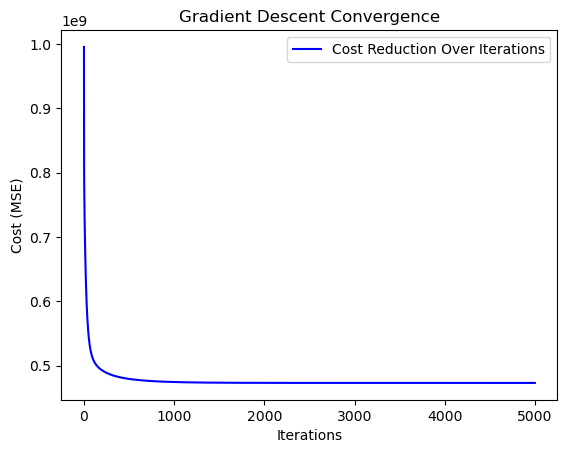

Final Weights: [ 69452.07935105     73.3907118    9429.42027789    774.99542447
   -545.73990129  -6850.50340807  -1781.27770502   -219.89602229
   -547.85309133    335.16145909   3581.65884809 -50389.96709809
  -4101.80541364  -1832.62132147 -15068.41691876 -17897.61183814
   2668.21850199  -1781.68882935  -4884.55680293     82.81534927
    201.11663634   -658.5653605 ]
MSE on Training Set: 946140514.9152039
RMSE on Training Set: 30759.397180621145
R-Squared on Training Set: 0.4279879380165812

MSE on Test Set: 943085292.111363
RMSE on Test Set: 30709.693780813952
R-Squared on Test Set: 0.42330357919213724
False
False


In [ ]:
if __name__ == "__main__":
    main()


## Linear regresion

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Calculate metrics for Linear Regression
train_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
train_r2_lr = r2_score(y_train, y_pred_train_lr)

test_mse_lr = mean_squared_error(y_test, y_pred_test_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
test_r2_lr = r2_score(y_test, y_pred_test_lr)

# Print results for Linear Regression
print("Linear Regression Results:")
print(f"MSE on Training Set: {train_mse_lr}")
print(f"RMSE on Training Set: {train_rmse_lr}")
print(f"R-Squared on Training Set: {train_r2_lr}")
print()
print(f"MSE on Test Set: {test_mse_lr}")
print(f"RMSE on Test Set: {test_rmse_lr}")
print(f"R-Squared on Test Set: {test_r2_lr}")


Linear Regression Results:
MSE on Training Set: 946140473.9512681
RMSE on Training Set: 30759.39651474437
R-Squared on Training Set: 0.4279879627823163

MSE on Test Set: 943087340.1343133
RMSE on Test Set: 30709.727125689562
R-Squared on Test Set: 0.4233023268266142


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest Regression
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_pred_train_rf)

test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Print results for Random Forest Regression
print("Random Forest Regression Results:")
print(f"MSE on Training Set: {train_mse_rf}")
print(f"RMSE on Training Set: {train_rmse_rf}")
print(f"R-Squared on Training Set: {train_r2_rf}")
print()
print(f"MSE on Test Set: {test_mse_rf}")
print(f"RMSE on Test Set: {test_rmse_rf}")
print(f"R-Squared on Test Set: {test_r2_rf}")


Random Forest Regression Results:
MSE on Training Set: 139287918.6055932
RMSE on Training Set: 11802.03027472787
R-Squared on Training Set: 0.9157901302449725

MSE on Test Set: 566827057.7202725
RMSE on Test Set: 23808.130076095276
R-Squared on Test Set: 0.6533853956384965


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameters for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Range of values for regularization strength
}

# Initialize Ridge model
ridge_model = Ridge()

# Apply GridSearchCV
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
print(f"Best hyperparameters for Ridge Regression: {ridge_grid_search.best_params_}")

# Retrain the Ridge model with the best hyperparameters
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(X_train, y_train)

# Predictions
y_pred_train_ridge = best_ridge_model.predict(X_train)
y_pred_test_ridge = best_ridge_model.predict(X_test)

# Evaluate performance on training and test sets
train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)

test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)

# Print results for Ridge Regression
print("Ridge Regression Results:")
print(f"MSE on Training Set: {train_mse_ridge}")
print(f"RMSE on Training Set: {train_rmse_ridge}")
print(f"R-Squared on Training Set: {train_r2_ridge}")
print()
print(f"MSE on Test Set: {test_mse_ridge}")
print(f"RMSE on Test Set: {test_rmse_ridge}")
print(f"R-Squared on Test Set: {test_r2_ridge}")


Best hyperparameters for Ridge Regression: {'alpha': 10}
Ridge Regression Results:
MSE on Training Set: 946140496.2668567
RMSE on Training Set: 30759.39687748862
R-Squared on Training Set: 0.4279879492908891

MSE on Test Set: 943085235.8112048
RMSE on Test Set: 30709.69286416269
R-Squared on Test Set: 0.42330361361966995


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for Random Forest with reduced search space
param_grid = {
    'n_estimators': [50, 100],          # Reduced number of estimators
    'max_depth': [None, 10],            # Limited depth range
    'min_samples_split': [2, 5]         # Fewer options for min_samples_split
}

# Create GridSearchCV object with parallelization
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,                             # Reduced cross-validation folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,                        # Use all CPU cores for parallelization
    verbose=1                          # Output progress to see the search progress
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest Regression:", grid_search_rf.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters for Random Forest Regression: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


## feature selection


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Assuming X_train and y_train are your training data
# Use SelectKBest with f_regression to select top K features
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features

# Fit the selector to the data
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_columns = selector.get_support(indices=True)

# Display the selected feature names
print("Selected Features:", X_train.columns[selected_columns])

# If you want to visualize the scores of the features
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


Selected Features: Index(['Age', 'Education Level', 'Marital Status_Married',
       'Marital Status_Widowed', 'Employment Status_Unemployed',
       'Alcohol Consumption_Moderate', 'Dietary Habits_Unhealthy',
       'Sleep Patterns_Good', 'Sleep Patterns_Poor',
       'History of Mental Illness_Yes'],
      dtype='object')
                              Feature          Score
10       Employment Status_Unemployed  160611.155759
1                     Education Level   24639.988892
17      History of Mental Illness_Yes    5007.747156
15                Sleep Patterns_Good    4539.462580
14           Dietary Habits_Unhealthy    3361.048328
16                Sleep Patterns_Poor    3302.078785
0                                 Age    1440.983857
5              Marital Status_Widowed     659.850698
3              Marital Status_Married     399.329273
12       Alcohol Consumption_Moderate     245.872333
20     Chronic Medical Conditions_Yes     240.612509
2                  Number of Children 

In [ ]:
# Create X_train and X_test using the selected features
X_train_final = X_train.iloc[:, selected_columns]
X_test_final = X_test.iloc[:, selected_columns]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Best hyperparameters for Random Forest (from previous GridSearch)
best_rf_params = grid_search_rf.best_params_

# Initialize and train Random Forest model with best hyperparameters
rf_model = RandomForestRegressor(n_estimators=best_rf_params['n_estimators'],
                                 max_depth=best_rf_params['max_depth'],
                                 min_samples_split=best_rf_params['min_samples_split'],
                                 random_state=42)
rf_model.fit(X_train_final, y_train)

# Predict on training and test sets
y_pred_train_rf = rf_model.predict(X_train_final)
y_pred_test_rf = rf_model.predict(X_test_final)

# Calculate performance metrics for Random Forest
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_pred_train_rf)

test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

# Print Random Forest results
print("Random Forest Results:")
print(f"MSE on Training Set: {train_mse_rf}")
print(f"RMSE on Training Set: {train_rmse_rf}")
print(f"R-Squared on Training Set: {train_r2_rf}")
print()
print(f"MSE on Test Set: {test_mse_rf}")
print(f"RMSE on Test Set: {test_rmse_rf}")
print(f"R-Squared on Test Set: {test_r2_rf}")


Random Forest Results:
MSE on Training Set: 446746379.7527267
RMSE on Training Set: 21136.37574781274
R-Squared on Training Set: 0.7299087040058871

MSE on Test Set: 461547172.5649871
RMSE on Test Set: 21483.648958335434
R-Squared on Test Set: 0.717764019141562


In [ ]:
from sklearn.linear_model import Ridge

# Best hyperparameters for Ridge Regression (from previous GridSearch)
best_ridge_params = ridge_grid_search.best_params_

# Initialize and train Ridge model with best hyperparameters
ridge_model = Ridge(alpha=best_ridge_params['alpha'])
ridge_model.fit(X_train_final, y_train)

# Predict on training and test sets
y_pred_train_ridge = ridge_model.predict(X_train_final)
y_pred_test_ridge = ridge_model.predict(X_test_final)

# Calculate performance metrics for Ridge Regression
train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)

test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)

# Print Ridge Regression results
print("Ridge Regression Results:")
print(f"MSE on Training Set: {train_mse_ridge}")
print(f"RMSE on Training Set: {train_rmse_ridge}")
print(f"R-Squared on Training Set: {train_r2_ridge}")
print()
print(f"MSE on Test Set: {test_mse_ridge}")
print(f"RMSE on Test Set: {test_rmse_ridge}")
print(f"R-Squared on Test Set: {test_r2_ridge}")


Ridge Regression Results:
MSE on Training Set: 975331098.8907645
RMSE on Training Set: 31230.291367369027
R-Squared on Training Set: 0.4103400666199557

MSE on Test Set: 970102465.8111548
RMSE on Test Set: 31146.467950815142
R-Squared on Test Set: 0.4067825842160281


# comparision between two models

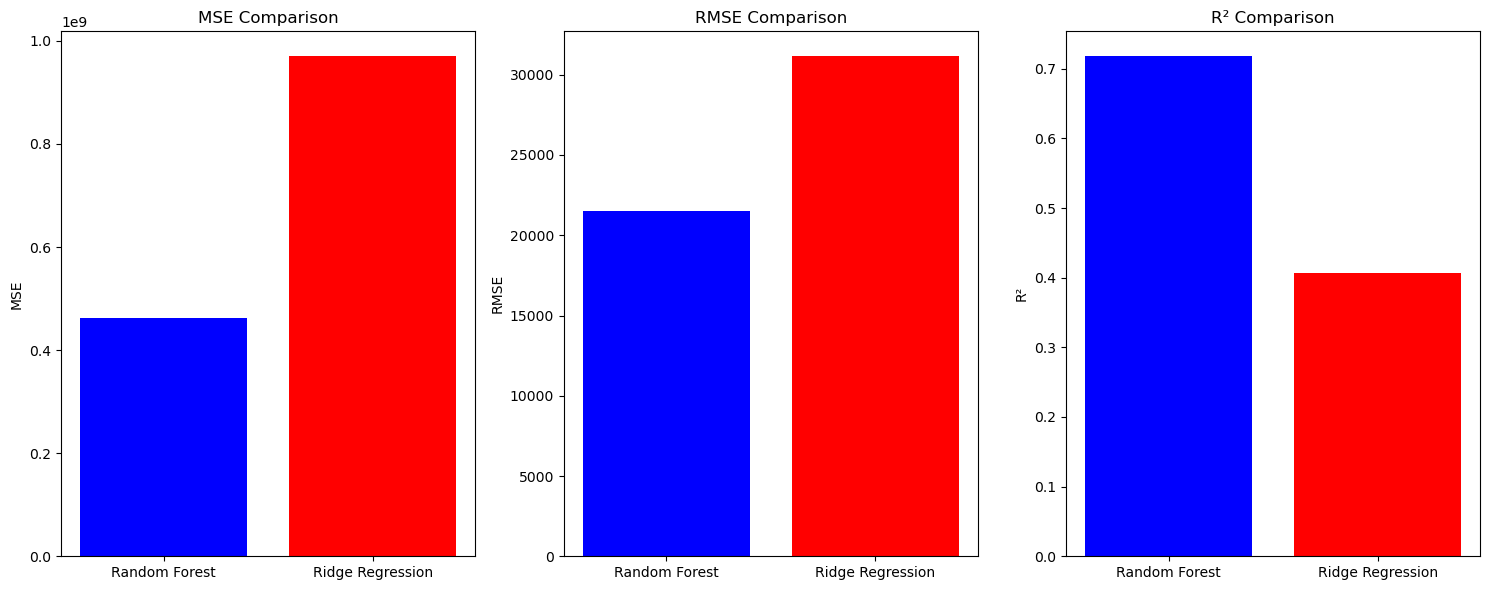

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
metrics = ['MSE', 'RMSE', 'R²']
random_forest = [461547172.5649871, 21483.648958335434, 0.717764019141562]
ridge_regression = [970102465.8111548, 31146.467950815142, 0.4067825842160281]

# Set up the figure with 3 subplots (one for each metric)
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Create bar plots for each metric
axes[0].bar(['Random Forest', 'Ridge Regression'], [random_forest[0], ridge_regression[0]], color=['b', 'r'])
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('MSE')

axes[1].bar(['Random Forest', 'Ridge Regression'], [random_forest[1], ridge_regression[1]], color=['b', 'r'])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE')

axes[2].bar(['Random Forest', 'Ridge Regression'], [random_forest[2], ridge_regression[2]], color=['b', 'r'])
axes[2].set_title('R² Comparison')
axes[2].set_ylabel('R²')

# Adjust layout and display
plt.tight_layout()
plt.show()


### Conclusion:

1. **Model Performance**: Random Forest performed better than Ridge Regression, with higher R² (0.72) and lower MSE/RMSE on both train and test sets.

2. **Impact of Methods**: Cross-validation and feature selection improved model accuracy by reducing noise and optimizing hyperparameters.

3. **Insights and Future Directions**: Random Forest is more suitable for this task. Future work could explore nonlinear features, ensemble methods, and further tuning for Ridge Regression.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
